# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

604


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# different api calls

# by city Name
# f"api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}"

# by city Name and State code
# f"api.openweathermap.org/data/2.5/weather?q={city name},{state code}&appid={API key}"

# by city Name, State code and Country code
# f"api.openweathermap.org/data/2.5/weather?q={city name},{state code},{country code}&appid={API key}"

# by city ID
# f"api.openweathermap.org/data/2.5/weather?id={city id}&appid={API key}"

# by geographic coordinates
# f"api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}"

# by zip codes
# f"api.openweathermap.org/data/2.5/weather?zip={zip code},{country code}&appid={API key}"

# api calls
# f"api.openweathermap.org/data/2.5/weather?id=2172797&appid={API key}"

print('Beginning Data Retrieval ')
print('-' * 30)

# store all data here
city_info = []

for index, city in enumerate(cities):
    city_url = f'http://api.openweathermap.org/data/2.5/weather?units=imperial&q={city}&appid={weather_api_key}'
    try:
        print(f'Processing record number {index} for city: {city}')
        # requests.get(city_url).json()
        data = requests.get(city_url).json()
        # check if you can get the weather for this city, then we have data, otherwise
        # we'll have an exception
        weather = data['weather']
        city_info.append(data)
    except:
        print(f"\nCould not find the city: {city}, skipping...\n")

print()
print('-' * 30)
print('Data Retrieval Complete')
print('-' * 30)

Beginning Data Retrieval 
------------------------------
Processing record number 0 for city: rikitea
Processing record number 1 for city: puerto ayora
Processing record number 2 for city: uvat
Processing record number 3 for city: ust-omchug
Processing record number 4 for city: port alfred
Processing record number 5 for city: chuy
Processing record number 6 for city: harper
Processing record number 7 for city: riyadh
Processing record number 8 for city: lodja
Processing record number 9 for city: makakilo city
Processing record number 10 for city: dikson
Processing record number 11 for city: sibolga
Processing record number 12 for city: nizhneyansk

Could not find the city: nizhneyansk, skipping...

Processing record number 13 for city: ushuaia
Processing record number 14 for city: poso
Processing record number 15 for city: kapaa
Processing record number 16 for city: mar del plata
Processing record number 17 for city: palmer
Processing record number 18 for city: hilo
Processing record n

Processing record number 155 for city: mayor pablo lagerenza
Processing record number 156 for city: borogontsy
Processing record number 157 for city: kirakira
Processing record number 158 for city: russell
Processing record number 159 for city: pevek
Processing record number 160 for city: misratah
Processing record number 161 for city: san lazaro
Processing record number 162 for city: saskylakh
Processing record number 163 for city: tianpeng
Processing record number 164 for city: fukue
Processing record number 165 for city: sangueya
Processing record number 166 for city: ust-ilimsk
Processing record number 167 for city: havre-saint-pierre
Processing record number 168 for city: shu
Processing record number 169 for city: east london
Processing record number 170 for city: moramanga
Processing record number 171 for city: sechura
Processing record number 172 for city: inta
Processing record number 173 for city: mahon
Processing record number 174 for city: fortuna
Processing record number 17

Processing record number 315 for city: hofn
Processing record number 316 for city: muscat
Processing record number 317 for city: lieksa
Processing record number 318 for city: carnarvon
Processing record number 319 for city: kiunga
Processing record number 320 for city: itaituba
Processing record number 321 for city: birjand
Processing record number 322 for city: santa isabel do rio negro
Processing record number 323 for city: lagoa
Processing record number 324 for city: seoul
Processing record number 325 for city: jadu
Processing record number 326 for city: kaeo
Processing record number 327 for city: pisco
Processing record number 328 for city: encruzilhada do sul
Processing record number 329 for city: salalah
Processing record number 330 for city: fomboni
Processing record number 331 for city: margate
Processing record number 332 for city: touros
Processing record number 333 for city: sao miguel do araguaia
Processing record number 334 for city: merauke
Processing record number 335 fo

Processing record number 472 for city: fort nelson
Processing record number 473 for city: hovd
Processing record number 474 for city: maumere
Processing record number 475 for city: cam ranh
Processing record number 476 for city: san lorenzo de el escorial
Processing record number 477 for city: port said
Processing record number 478 for city: sataua

Could not find the city: sataua, skipping...

Processing record number 479 for city: aloleng
Processing record number 480 for city: camopi
Processing record number 481 for city: vostok
Processing record number 482 for city: dong hoi
Processing record number 483 for city: grand river south east

Could not find the city: grand river south east, skipping...

Processing record number 484 for city: meulaboh
Processing record number 485 for city: karaul

Could not find the city: karaul, skipping...

Processing record number 486 for city: panlaitan
Processing record number 487 for city: adrar
Processing record number 488 for city: tilichiki
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#city_info_df = pd.DataFrame(city_info)
# print(city_info)
#city_info_df.to_csv(output_data_file)

# this is how we have them in city_info
# coord {lon, lat}
# weather {id, main, description, icon}
# base
# main {temp, feels_like, temp_min, temp_max, pressure, humidity, sea_level, grnd_level}
# visibility
# wind {speed, deg, gust}
# rain
# clouds
# dt
# sys {type, id, country, sunrise, sunset}
# timezone
# id
# name
# cod

# this is what we want:
# City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date

city_data = []

for data in city_info:
    try:
        name = data['name']
        # if we find the coord, then get the lat
        lat = data['coord'].get('lat')
        lon = data['coord'].get('lon')
        max_temp = data['main']['temp_max']
        humidity = data['main']['humidity']
        cloud = data['clouds']['all']
        wind_speed = data['wind']['speed']
        country = data['sys']['country']
        date = data['dt']
        city = {'City': name, 'Lat': lat, 'Lon': lon, 'Max Temp': max_temp,
                    'Humidity': humidity, 'Cloudiness': cloud, 'Wind Speed': wind_speed,
                    'Country': country, 'Date': date}
        city_data.append(city)
    except Exception as ex:
        print(ex, key, data)

city_data_df = pd.DataFrame(city_data)
  
city_data_df.to_csv(output_data_file)

city_data_df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,69.04,57,77,20.09,PF,1627939125
1,Puerto Ayora,-0.7393,-90.3518,78.76,82,72,11.95,EC,1627939282
2,Uvat,59.1433,68.8953,57.27,90,71,6.02,RU,1627939387
3,Ust'-Omchug,61.1500,149.6333,41.61,63,9,7.27,RU,1627939387
4,Port Alfred,-33.5906,26.8910,58.30,80,46,20.62,ZA,1627939264
...,...,...,...,...,...,...,...,...,...
555,Bugiri,0.5714,33.7417,63.57,70,12,5.23,UG,1627939561
556,Mikhaylov,54.2292,39.0186,65.48,84,66,17.13,RU,1627939562
557,Urusha,54.0500,122.9000,52.70,98,79,3.18,RU,1627939562
558,La Ronge,55.1001,-105.2842,86.25,25,75,1.14,CA,1627939563


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humidity = city_data_df[city_data_df['Humidity'] > 100]
humidity

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.
indexis = []
if humidity.index.any():
    # if you find an index where the humidity is > 100
    indexis = humidity.index
    city_data_df = city_data_df.drop(index=indexis)

#for index in indexis:
#    city_data_df.drop(index=index)

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = pd.DataFrame(city_data_df)
clean_city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,69.04,57,77,20.09,PF,1627939125
1,Puerto Ayora,-0.7393,-90.3518,78.76,82,72,11.95,EC,1627939282
2,Uvat,59.1433,68.8953,57.27,90,71,6.02,RU,1627939387
3,Ust'-Omchug,61.1500,149.6333,41.61,63,9,7.27,RU,1627939387
4,Port Alfred,-33.5906,26.8910,58.30,80,46,20.62,ZA,1627939264
...,...,...,...,...,...,...,...,...,...
555,Bugiri,0.5714,33.7417,63.57,70,12,5.23,UG,1627939561
556,Mikhaylov,54.2292,39.0186,65.48,84,66,17.13,RU,1627939562
557,Urusha,54.0500,122.9000,52.70,98,79,3.18,RU,1627939562
558,La Ronge,55.1001,-105.2842,86.25,25,75,1.14,CA,1627939563


In [27]:
def scatter_plot(y, y_label, y_units):
    clean_city_data.plot(kind='scatter', x='Lat', y=y, edgecolor='black')
    plt.ylabel(f'{y_label} (y_units)')
    plt.xlabel("Latitude")
    date = time.localtime()
    plt.title(f'Latitude vs {y_label} Plot')
    # save it as a png
    plt.savefig(f"./pngs/LATvs{y_label}.png")
    plt.show()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

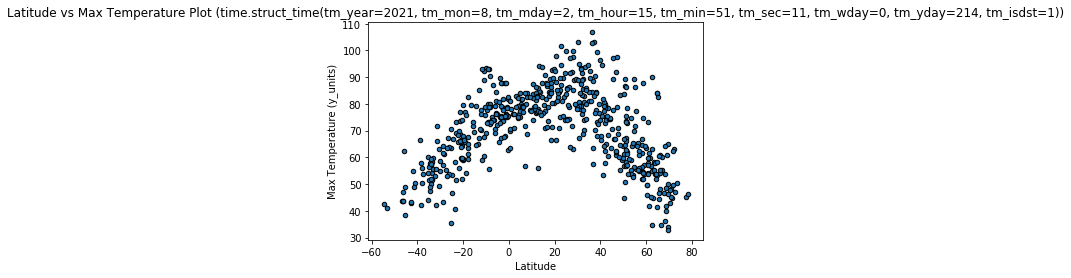

In [28]:
#plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'])
scatter_plot(y='Max Temp', y_label='Max Temperature', y_units='F')
# clean_city_data.plot(kind='scatter', x='Lat', y='Max Temp')
# plt.ylabel("Max Temperature (F)")
# plt.xlabel("Latitude")
# plt.title('Latitude vs Temperature Plot')

# # save it as a png
# plt.savefig(f"./pngs/LATvsTEMP.png")
# plt.show()

## Latitude vs. Humidity Plot

In [ ]:
# clean_city_data.plot(kind='scatter', x='Lat', y='Humidity')
# plt.ylabel("Humidity (%)")
# plt.xlabel("Latitude")
# plt.title('Latitude vs Humidity Plot')
# plt.show()
scatter_plot(y='Humidity', y_label='Humidity', y_units='%')

## Latitude vs. Cloudiness Plot

In [ ]:
# clean_city_data.plot(kind='scatter', x='Lat', y='Cloudiness')
# plt.ylabel("Cloudiness (%)")
# plt.xlabel("Latitude")
# plt.title('Latitude vs Cloudiness Plot')
# plt.show()
scatter_plot(y='Cloudiness', y_label='Cloudiness', y_units='%')

## Latitude vs. Wind Speed Plot

In [ ]:
# clean_city_data.plot(kind='scatter', x='Lat', y='Wind Speed')
# plt.ylabel("Wind Speed (mph)")
# plt.xlabel("Latitude")
# plt.title('Latitude vs Wind Speed Plot')
# plt.show()
scatter_plot(y='Wind Speed', y_label='Wind Speed', y_units='mph')

## Linear Regression

In [30]:
def linear_regression(x_values, y_values, title, x_label, y_label, anotate_xy, mark_type='b--', color='pink'):
    # calculate the linear regression with scipy.stats
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression = x_values * slope + intercept
    # slope line equation
    # y = mx + b where m = slope and b = y intercept
    eq_line = f'y = {round(slope,3)}x + {round(intercept,3)}'

    print('Regression')
    print('----------------')
    print(f'rValue: {rvalue}')

    # plot the regression
    plt.figure(figsize=(10, 7))
    plt.scatter(x_values, y_values, s=30, color=color, edgecolor='black')
    plt.plot(x_values, regression, mark_type)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(s=eq_line, xy=anotate_xy, fontsize=14, color='red', verticalalignment='top')
    
    plt.savefig(f"./pngs/{title}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression
----------------
rValue: -0.641671209471972


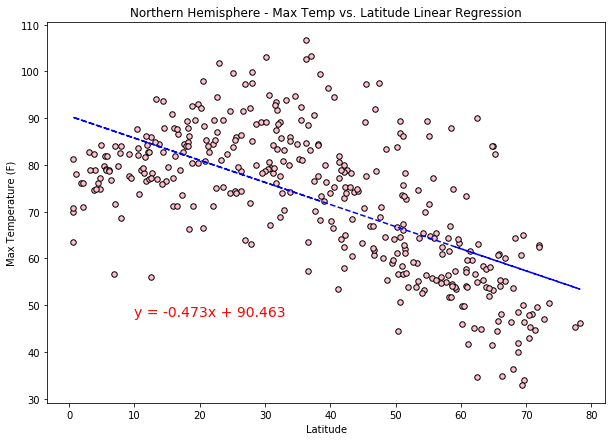

In [31]:
north_hemisphere = clean_city_data[clean_city_data['Lat'] >= 0]
north_hemisphere

north_temp = north_hemisphere['Max Temp']
north_lat = north_hemisphere['Lat']

linear_regression(x_values=north_lat, y_values=north_temp,
                  title='Northern Hemisphere - Max Temp vs. Latitude Linear Regression',
                 x_label='Latitude', y_label='Max Temperature (F)', anotate_xy=(10, 50))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression
----------------
rValue: 0.7883215438669563


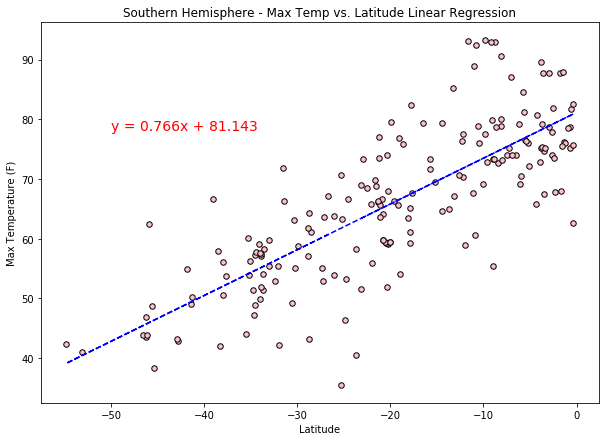

In [32]:
south_hemisphere = clean_city_data[clean_city_data['Lat'] < 0]
south_hemisphere

south_temp = south_hemisphere['Max Temp']
south_lat = south_hemisphere['Lat']

linear_regression(x_values=south_lat, y_values=south_temp,
                  title='Southern Hemisphere - Max Temp vs. Latitude Linear Regression',
                 x_label='Latitude', y_label='Max Temperature (F)', anotate_xy=(-50, 80))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression
----------------
rValue: 0.034559697325848265


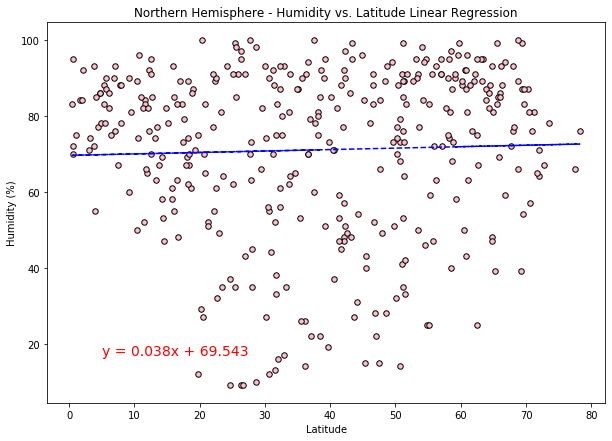

In [33]:
north_humidity = north_hemisphere['Humidity']
linear_regression(x_values=north_lat, y_values=north_humidity,
                  title='Northern Hemisphere - Humidity vs. Latitude Linear Regression',
                 x_label='Latitude', y_label='Humidity (%)', anotate_xy=(5, 20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression
----------------
rValue: -0.06931603601534772


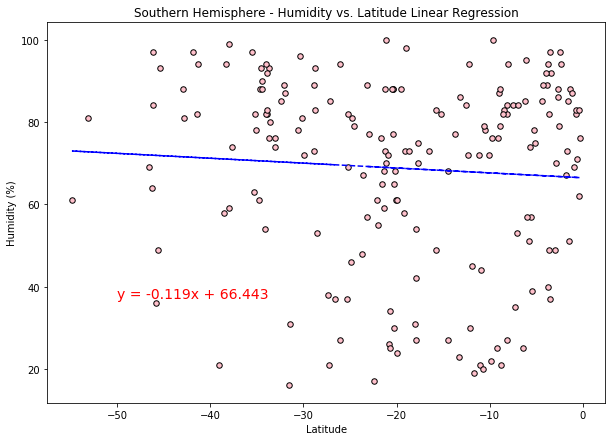

In [34]:
south_humidity = south_hemisphere['Humidity']
linear_regression(x_values=south_lat, y_values=south_humidity,
                  title='Southern Hemisphere - Humidity vs. Latitude Linear Regression',
                 x_label='Latitude', y_label='Humidity (%)', anotate_xy=(-50, 40))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression
----------------
rValue: -0.0159922177162899


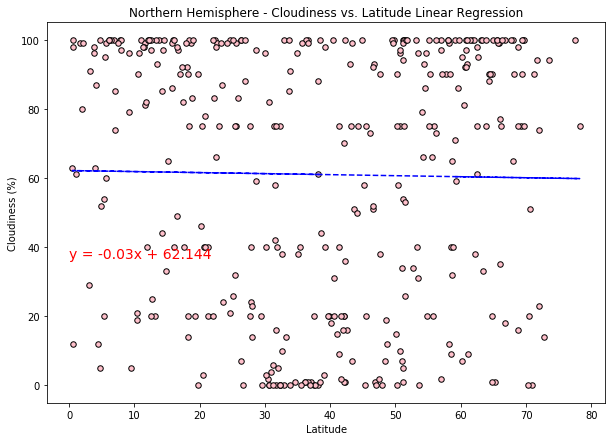

In [37]:
north_cloudiness = north_hemisphere['Cloudiness']
linear_regression(x_values=north_lat, y_values=north_cloudiness,
                  title='Northern Hemisphere - Cloudiness vs. Latitude Linear Regression',
                 x_label='Latitude', y_label='Cloudiness (%)', anotate_xy=(0, 40))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression
----------------
rValue: 0.05189142622830507


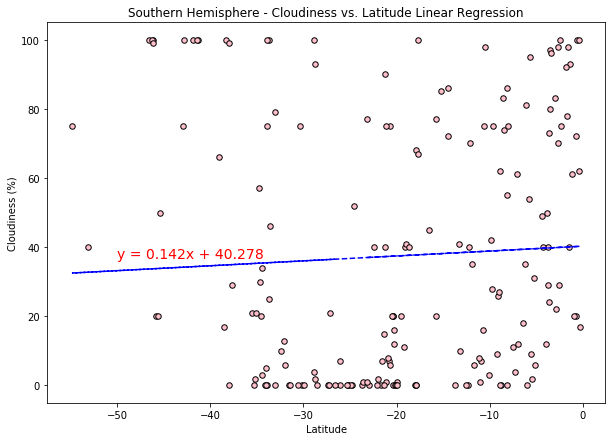

In [38]:
south_cloudiness = south_hemisphere['Cloudiness']
linear_regression(x_values=south_lat, y_values=south_cloudiness,
                  title='Southern Hemisphere - Cloudiness vs. Latitude Linear Regression',
                 x_label='Latitude', y_label='Cloudiness (%)', anotate_xy=(-50, 40))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression
----------------
rValue: -0.1053842308819357


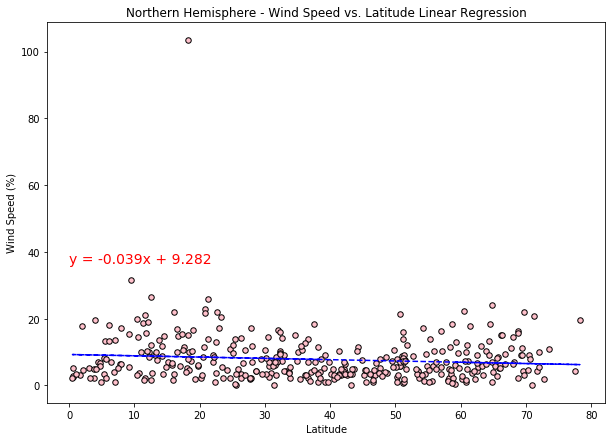

In [39]:
north_wind = north_hemisphere['Wind Speed']
linear_regression(x_values=north_lat, y_values=north_wind,
                  title='Northern Hemisphere - Wind Speed vs. Latitude Linear Regression',
                 x_label='Latitude', y_label='Wind Speed (%)', anotate_xy=(0, 40))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression
----------------
rValue: -0.1583134855829364


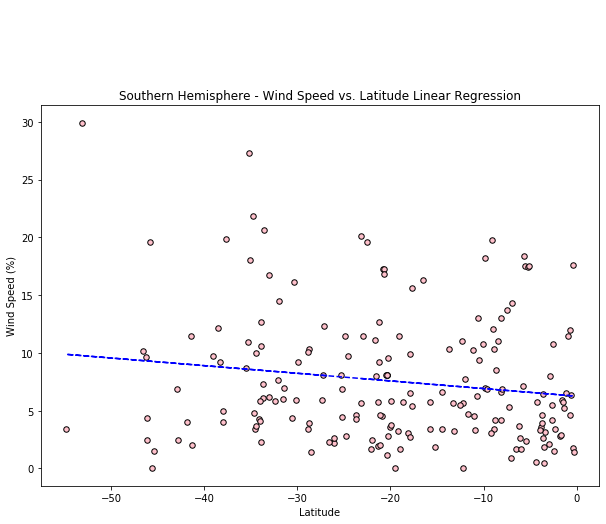

In [40]:
south_wind = south_hemisphere['Wind Speed']
linear_regression(x_values=south_lat, y_values=south_wind,
                  title='Southern Hemisphere - Wind Speed vs. Latitude Linear Regression',
                 x_label='Latitude', y_label='Wind Speed (%)', anotate_xy=(-50, 40))